In [28]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{max-width:80%!important;width:auto!important;}</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%reload_ext autoreload
%autoreload 2
%matplotlib inline

from tqdm.notebook import trange, tqdm

import cv2
import numpy as np

from tqdm.notebook import tqdm

from pathlib import Path
colour = Path('../GTA_images/Simple/Colour')
depth = Path('../GTA_images/Simple/Depth')

import sys
sys.path.append('../')

from depth_Functions import (
    import_raw_colour_image, 
    import_raw_depth_image, 
    show_img,
    show_array_of_images,
    show_function,
    stand
)

from Feature_Extraction import (
    get_feature_vector,
    get_squared_features,
    get_features_with_squares
)

from Feature_Patches import Patches

from Laplacian import Laplacian

In [29]:
colour_images = [import_raw_colour_image(str(file)) for file in sorted(colour.iterdir())]
depth_images = [import_raw_depth_image(str(file)) for file in sorted(depth.iterdir())]

In [30]:
train_images = colour_images[:-1]
train_labels = depth_images[:-1]
test_images = colour_images[-1]
test_labels = depth_images[-1]

In [31]:
functions = 3*[get_feature_vector, get_squared_features, get_features_with_squares]
weights = [np.zeros((720,17*3)), np.zeros((720,17*3)), np.zeros((720,34*3))] 
weights = [w+1e-2 for w in weights]

In [32]:
test = Laplacian(np.full((240,2,17),1e-3), np.full((240,2,17,17),1e-8), get_feature_vector)

In [33]:
test.weights.shape
test.var_weights.shape
test.relative_weights.shape
test.relative_var_weights.shape

(240, 2, 17)

(240, 2, 17, 17)

(4, 240, 2, 17)

(4, 240, 2, 17, 17)

In [ ]:
test.train(train_images, train_labels)

In [ ]:
test.weights.shape

In [ ]:
test_prediction = test.predict(test_images)

In [18]:
test_prediction.shape

(720, 1280)

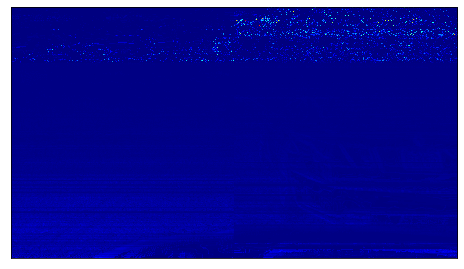

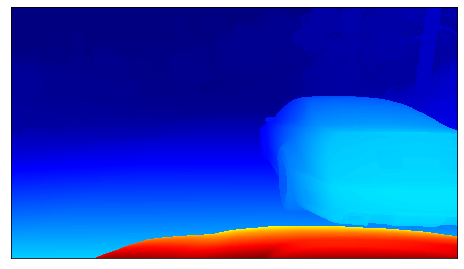

In [19]:
show_img(test_prediction, depthmap=True)
show_img(test_labels, depthmap=True)